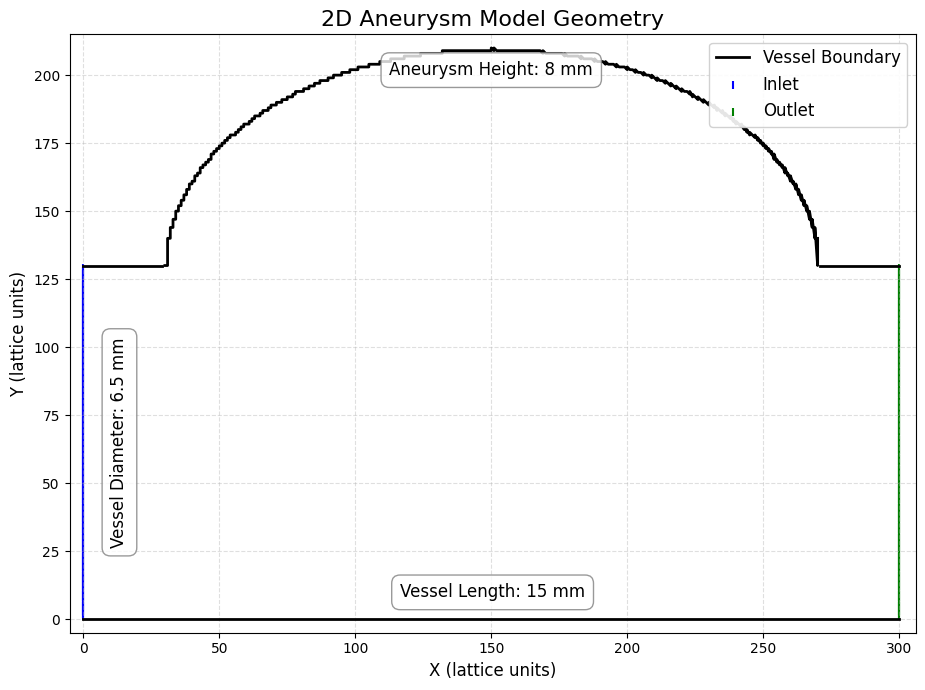

(<Figure size 1000x700 with 1 Axes>,
 <Axes: title={'center': '2D Aneurysm Model Geometry'}, xlabel='X (lattice units)', ylabel='Y (lattice units)'>)

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def plot_aneurysm_geometry(vessel_length_mm=15, vessel_diameter_mm=6.5, 
                          bulge_horizontal_mm=12, bulge_vertical_mm=8,
                          resolution_mm=0.05):
    """
    Plot the 2D aneurysm geometry with inlet, outlet, and vessel walls.
    """
    # Convert mm to lattice units
    mm_to_m = 0.001
    resolution_m = resolution_mm * mm_to_m
    vessel_length_lu = int(round(vessel_length_mm * mm_to_m / resolution_m))
    vessel_diameter_lu = int(round(vessel_diameter_mm * mm_to_m / resolution_m))
    bulge_horizontal_lu = int(round(bulge_horizontal_mm * mm_to_m / resolution_m))
    bulge_vertical_lu = int(round((bulge_vertical_mm/2) * mm_to_m / resolution_m))
    
    # Grid shape
    grid_x = vessel_length_lu + 1
    grid_y = vessel_diameter_lu + bulge_vertical_lu + 1
    
    # Vessel center and bulge parameters
    vessel_centre_lu = vessel_diameter_lu // 2
    bulge_centre_x_lu = vessel_length_lu // 2
    bulge_centre_y_lu = vessel_centre_lu + (vessel_diameter_lu // 2)
    
    # Create a figure 
    fig, ax = plt.subplots(figsize=(10, 7))
    
    # Parameters for the elliptical bulge
    x0 = bulge_centre_x_lu
    y0 = bulge_centre_y_lu
    a = bulge_horizontal_lu // 2
    b = bulge_vertical_lu
    
    # Generate curve points for the bulge
    curve_x = []
    curve_y = []
    last_y = None
    
    for x_coord in range(x0 - a, x0 + a + 1):
        # Calculate exact y coordinate for upper curve
        y_coord = y0 + b * np.sqrt(1 - ((x_coord - x0)**2 / a**2))
        y_base = int(y_coord)
        
        # Fill gaps between consecutive y coordinates
        if last_y is not None:
            for y_fill in range(min(last_y, y_base), max(last_y, y_base) + 1):
                curve_x.append(x_coord)
                curve_y.append(y_fill)
        else:
            curve_x.append(x_coord)
            curve_y.append(y_base)
            
        last_y = y_base
    
    # Create straight sections of vessel wall
    loc_upper = round(vessel_centre_lu + vessel_diameter_lu // 2)
    loc_lower = round(vessel_centre_lu - vessel_diameter_lu // 2)
    
    # Upper left straight wall
    upper_left_x = list(range(min(curve_x)))
    upper_left_y = [loc_upper] * len(upper_left_x)
    
    # Upper right straight wall
    upper_right_x = list(range(max(curve_x) + 1, grid_x))
    upper_right_y = [loc_upper] * len(upper_right_x)
    
    # Lower straight wall
    lower_x = list(range(grid_x))
    lower_y = [loc_lower] * len(lower_x)
    
    # Inlet and outlet
    inlet_x = [0] * (loc_upper - loc_lower - 1)
    inlet_y = list(range(loc_lower + 1, loc_upper))
    
    outlet_x = [grid_x - 1] * (loc_upper - loc_lower - 1)
    outlet_y = list(range(loc_lower + 1, loc_upper))
    
    # Plot all walls with the same style and color including aneurysm boundary
    wall_color = 'k'  # Using black for all walls
    ax.plot(upper_left_x, upper_left_y, color=wall_color, linewidth=2, label='Vessel Boundary')
    ax.plot(upper_right_x, upper_right_y, color=wall_color, linewidth=2)  # No label
    ax.plot(lower_x, lower_y, color=wall_color, linewidth=2)  # No label
    ax.plot(curve_x, curve_y, color=wall_color, linewidth=2)  # Same color as vessel walls
    
    # Plot inlet and outlet
    ax.scatter(inlet_x, inlet_y, color='blue', s=40, marker='|', label='Inlet')
    ax.scatter(outlet_x, outlet_y, color='green', s=40, marker='|', label='Outlet')
    
    # Set up the plot
    ax.set_xlim(-5, grid_x + 5)
    ax.set_ylim(-5, max(curve_y) + 5)
    ax.set_aspect('equal')
    ax.set_title('2D Aneurysm Model Geometry', fontsize=16)
    ax.set_xlabel('X (lattice units)', fontsize=12)
    ax.set_ylabel('Y (lattice units)', fontsize=12)
    
    # Create a cleaner legend with fewer entries
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc='upper right', framealpha=0.9, fontsize=12)
    
    # Add grid with softer appearance
    ax.grid(True, linestyle='--', alpha=0.4)
    
    # Add text annotations for dimensions - MOVED INWARD toward center
    # Aneurysm height - moved lower (closer to the aneurysm)
    ax.text(bulge_centre_x_lu, max(curve_y) - 10, f'Aneurysm Height: {bulge_vertical_mm} mm', 
            horizontalalignment='center', fontsize=12,
            bbox=dict(facecolor='white', edgecolor='gray', alpha=0.8, boxstyle='round,pad=0.5'))
    
    # Vessel length - moved upward (closer to the vessel)
    ax.text(grid_x/2, loc_lower + 8, f'Vessel Length: {vessel_length_mm} mm', 
            horizontalalignment='center', fontsize=12,
            bbox=dict(facecolor='white', edgecolor='gray', alpha=0.8, boxstyle='round,pad=0.5'))
    
    # Vessel diameter - moved rightward (closer to the vessel)
    ax.text(10, (loc_upper + loc_lower)/2, f'Vessel Diameter: {vessel_diameter_mm} mm', 
            verticalalignment='center', rotation=90, fontsize=12,
            bbox=dict(facecolor='white', edgecolor='gray', alpha=0.8, boxstyle='round,pad=0.5'))
    
    plt.tight_layout()
    plt.show()
    
    return fig, ax

# Plot with the parameters from standard_run.py
plot_aneurysm_geometry(
    vessel_length_mm=15,
    vessel_diameter_mm=6.5,
    bulge_horizontal_mm=12,
    bulge_vertical_mm=8,
    resolution_mm=0.05
)